<a href="https://colab.research.google.com/github/kkkonts/coursera-matstat-AB/blob/main/hw06_miners_asy_int.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Аварии на шахтах

In [39]:
import numpy as np
import math

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-pastel')
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии
* насколько большой у среднего числа аварий доверительный интервал

In [4]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий.

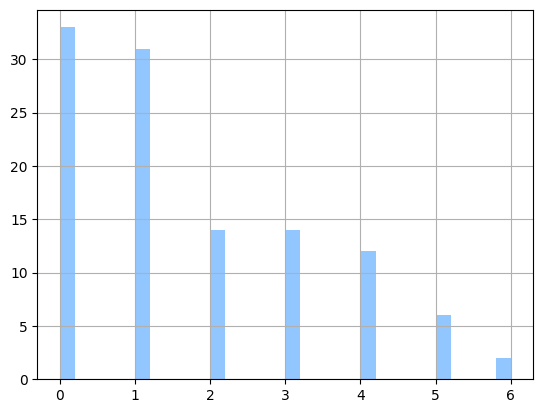

In [5]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$.

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [6]:
n_hat = df.shape[0]   # число наблюдений
lam_hat = df['count'].mean()      # ваша оценка метода моментов
lam_hat

1.7053571428571428

In [7]:
# проверка, что оценка была найдена корректно
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112


__б) Стандартное отклонение__

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`.

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка.

In [54]:
lam_se =  np.sqrt(sum((df['count'] - lam_hat)**2)/(n_hat))

lam_se

1.6401131976239944

In [28]:
# проверка, что оценка была найдена корректно
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [34]:
alpha = 0.1

left = lam_hat + np.sqrt(lam_hat / n_hat) * sts.norm.ppf(alpha/2, 0, 1)
right = lam_hat + sts.norm.ppf(1 - alpha/2, 0, 1)
delta = right - left

# your code here


In [35]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал.

In [37]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05

lam = x.mean() - y.mean()


left = lam + np.sqrt(x.mean() / x.shape[0] + y.mean() / y.shape[0]) * sts.norm.ppf(alpha/2, 0, 1)
right = lam + np.sqrt(x.mean() / x.shape[0] + y.mean() / y.shape[0]) * sts.norm.ppf(1 - alpha/2, 0, 1)
delta = right - left

# your code here
left

1.283547385971639

In [38]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось.

__д) Вероятность для распределения Пуассона__

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании.

In [44]:
def poiss_prob(k):
    return lam_hat**k * np.exp(-lam_hat) / math.factorial(k)
# your code here
poiss_prob(1)

0.3098761473208731

In [45]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [46]:
def poiss_prob(k):
    return lam_hat**k * np.exp(-lam_hat) / math.factorial(k)
def poiss_prob_der(k):
    return np.exp(-lam_hat) * (lam_hat**(k-1) / math.factorial(k - 1) - lam_hat**k / math.factorial(k))

In [86]:
alpha = 0.05
n = n_hat

left = poiss_prob(1) + sts.norm.ppf(alpha/2, 0, 1)* np.sqrt(df['count'].std()**2 * (poiss_prob_der(1))**2/n)
# right = ...
# delta = ...

left
# poiss_prob(1) + poiss_prob_der(1) * lam_se * sts.norm.ppf(alpha/2, 0, 1)

0.27077024629916013

In [58]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


AssertionError: 

По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [73]:
def poiss_prob(k):
    return lam_hat**k * np.exp(-lam_hat) / math.factorial(k)
def poiss_prob_der(k):
    if k == 0:
        return np.exp(-lam_hat)
    return np.exp(-lam_hat) * (lam_hat**(k-1) / math.factorial(k - 1) - lam_hat**k / math.factorial(k))

def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    return (sts.norm.ppf(alpha/2, poiss_prob(k), lam_se * (poiss_prob_der(k)**2)),
            sts.norm.ppf(1 - alpha/2, poiss_prob(k), lam_se * (poiss_prob_der(k)**2)))
# your code here
left, right = prob_ci(0)
delta = right - left
delta

0.2789757828183098

In [65]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

AssertionError: 

Сделали функцию? Запускайте код для не очень информативной картинки!

In [ ]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = prob_ci(x)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него.

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие.

In [68]:
df['count'].mean()

1.7053571428571428

In [69]:
df['count'].var()

2.714205276705277

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.